In [1]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

aa = np.array([1, 0, 1, 0])
bb = pd.DataFrame([aa], columns=['one','two','three','four'])
r = [2,2,2,2]
bb.loc[0,'one'] = r[0]
print(bb)


   one  two  three  four
0    2    0      1     0


In [3]:
print("\nGPU Status:")
import tensorflow as tf
tf.test.gpu_device_name() #檢查GPU是否啟動，若無啟動則會自動改由CPU執


GPU Status:


'/device:GPU:0'

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
import xgboost as xgb
from xgboost import plot_importance
sns.set(style='whitegrid',context='notebook')

In [25]:
# 資料載入
df = pd.read_csv(r'drive/MyDrive/AI比賽專案/智慧農業/訓練資料/train_data.csv')
data = df.drop(['Unnamed: 0'],axis=1)
label = df.loc[:,['actuator01','actuator02','actuator03','actuator04',
                  'actuator05','actuator06','actuator07','actuator08','actuator09','actuator10','actuator11']]

#新增特徵

In [26]:
# 新增早上或晚上 早上0 晚上1
list1 = []
for i in range(data.shape[0]):
  a = data.iloc[i,0]
  a = a.split(' ')
  b = a[1].split(':')
  time = 10*int(b[0][0])+int(b[0][1])
  if time <= 12:
    list1.append(0)
  else:
    list1.append(1)
data['d.time'] = list1     

In [27]:
# 新增天數
def sum_day(month,day):
  month_list = ['01','02','03','04','05','06','07','08','09','10','11','12']
  count = 0
  for m in month_list:
      if m[0] == '0':
        if m == '01':
          count = count
        elif m == '02':
          count = count + 31
        elif m == '03':
          count = count + 29
        elif int(m[1])%2 == 0:
          count = count + 31
        else:
          count = count + 30
      else:
        if m == '10':
          count = count + 31
        elif m == '11':
          count = count +30
        else:
          count = count + 31
      if m == month:
        day = int(day) + count
        break
  return day             

list1 = []
for i in range(data.shape[0]):
  a = data.iloc[i,0]
  a = a.split(' ')
  b = a[0].split('-')
  day = sum_day(b[1],b[2])
  list1.append(day)
data['d.day'] = list1   

In [ ]:
'''
# 新增一個actuator10注水次數欄位
data['actuator10_water_times'] = -1

# 計算一天內每個時段的累積注水次數
day = '07/31'
list1 = []
count = 0 # 今日的注水次數
for i in range(data.shape[0]):
  a = data.iloc[i,0]
  a =  a.split(' ')
  b = a[0].split('-')
  day2 = b[1]+'/'+b[2]
  if day == day2:
      list1.append(count)
      if label['actuator10'][i] == 1:
        count = count + 1
  else:
      day = day2
      count = 0 
      list1.append(count)
      if label['actuator10'][i] == 1:
        count = count + 1
data['actuator10_water_times'] = list1
'''

In [ ]:
'''
# 新增一個actuator11注水次數欄位
data['actuator11_water_times'] = -1

# 計算一天內每個時段的累積注水次數
day = '07/31'
list1 = []
count = 0 # 今日的注水次數
for i in range(5):
  a = data.iloc[i,0]
  a =  a.split(' ')
  b = a[0].split('-')
  day2 = b[1]+'/'+b[2]
  if day == day2:
      list1.append(count)
      if label['actuator11'][i] == 1:
        count = count + 1
  else:
      day = day2
      count = 0 
      list1.append(count)
      if label['actuator11'][i] == 1:
        count = count + 1
data['actuator11_water_times'] = list1
'''

In [28]:
# 處理d.log_time，轉成分鐘
import pandas as pd
list1 = []
for i in range(data.shape[0]):
  a = data.iloc[i,0]
  a = a.split(' ')
  time = a[1].split(':')
  hour = time[0]
  minute = time[1]
  time = 0
  if hour[0] == '0':
    time = int(hour[1])*60
  else:
    time = int(hour)*60
  if minute[0] == '0':
    time = time + int(minute[1])
  else:
    time = time + int(minute)
  list1.append(time)
data['d.minute'] = list1

In [29]:
data = data.drop(['d.log_time','actuator01','actuator02','actuator03','actuator04','actuator05','actuator06','actuator07','actuator08','actuator09','actuator10','actuator11'],axis=1)

#處理資料不平均

In [ ]:
from imblearn.over_sampling import SMOTE, ADASYN
from collections import Counter

X_train, X_test, y_train, y_test = train_test_split(data, 
                                                    label, 
                                                    test_size=0.3, 
                                                    random_state=1)
n = 'actuator11'
x_smote, y_smote = SMOTE().fit_sample(X_train, y_train[n])
x_adasym, y_adasym = ADASYN().fit_sample(X_train, y_train[n])
x_smote = pd.DataFrame(x_smote)
x_adasym = pd.DataFrame(x_adasym)
x_smote.columns = X_train.columns
x_adasym.columns = X_train.columns

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_sample(X_train, y_train['actuator10'])
print(X_resampled.shape)
print(y_resampled.shape)


actuator10 : accuracy:73%


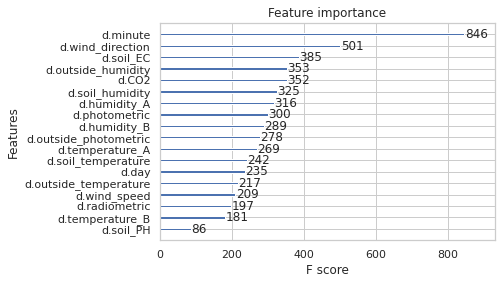

分類準確率 :  0.7287084698175011
              precision    recall  f1-score   support

           0       1.00      0.72      0.84      8238
           1       0.11      0.96      0.21       310

    accuracy                           0.73      8548
   macro avg       0.56      0.84      0.52      8548
weighted avg       0.97      0.73      0.81      8548



In [44]:
from xgboost import XGBClassifier

xg = XGBClassifier(n_estimators=200,
                   learning_rate= 0.5,
                   max_depth=6,
                   min_child_weight=1,
                   scale_pos_weight=100)

n = 'actuator10'
Xdata = pd.DataFrame(X_resampled)
Xdata.columns = data.columns
model = xg.fit(Xdata,y_resampled)
#計算準確率
accuracy = accuracy_score(y_test[n],y_predict)
print('actuator10 : accuracy:%2.f%%'%(accuracy*100))
 
# 顯示重要特徵
plot_importance(xg)
plt.show()

# 分類報告
print('分類準確率 : ',accuracy_score(y_test[n],y_predict))
print(classification_report(y_test[n],y_predict,target_names=['0','1']))

# AdaBoost


分類準確率 :  0.8693261581656527
              precision    recall  f1-score   support

           0       0.98      0.88      0.93      8238
           1       0.13      0.46      0.20       310

    accuracy                           0.87      8548
   macro avg       0.55      0.67      0.57      8548
weighted avg       0.95      0.87      0.90      8548



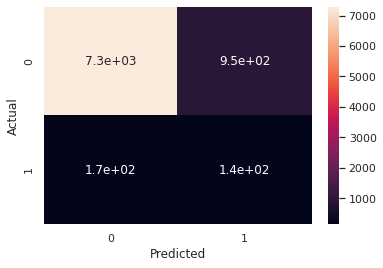

In [ ]:
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

tree = tree.DecisionTreeClassifier(criterion='gini',
                                   max_depth=3,
                                   random_state=2)
ada = AdaBoostClassifier(base_estimator=tree,
                         n_estimators=500,
                         learning_rate=0.1,
                         random_state=1)

xg = XGBClassifier(n_estimators=100,
                   learning_rate=0.3,
                   max_depth=4)

count_old = 0
count_new = 0
index = 0
for i in range(1,25):
  count_new = i*792
  train_data = np.vstack((actuator10_data_0[count_old:count_new],actuator10_data_1))
  train_data = pd.DataFrame(train_data,columns=X_train.columns)
  train_label = np.vstack((actuator10_label_0[count_old:count_new],actuator10_label_1))
  train_label = train_label.ravel()
  xg.fit(train_data,train_label)
  # print(count_old,' ',count_new)
  # count_old = count_new
  
  if i == 1:
    count_old = count_new
  else:
    if index == 4:
      count_old = count_new
      index = 0
    else:
      index = index + 1
  
  

y_predict = xg.predict(X_test)
print('分類準確率 : ',accuracy_score(y_test[n],y_predict))
print(classification_report(y_test[n],y_predict,target_names=['0','1']))

# train_data = np.vstack((actuator10_data_0[count_old:count_new],actuator10_data_1))
# train_data = pd.DataFrame(train_data,columns=X_train.columns)
# train_label = np.vstack((actuator10_label_0[count_old:count_new],actuator10_label_1)).ravel()
# print(train_data.columns)

confusion_matrix = pd.crosstab(y_test[n], y_predict, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)


In [ ]:
y_test.shape

(8548, 11)

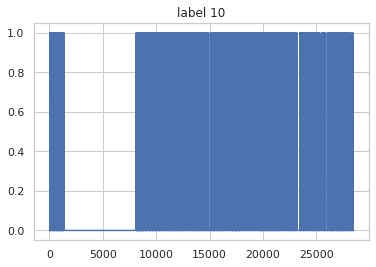

In [ ]:
la = label[n]
plt.plot(la)
plt.title('label 10')
plt.show()

In [ ]:
# 調整訓練資料
train_2 = []


(19945, 18)


In [ ]:
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier

list1 = ['actuator01','actuator02','actuator03','actuator04','actuator05','actuator06','actuator07','actuator08','actuator09','actuator10','actuator11']

tree = tree.DecisionTreeClassifier(criterion='gini',
                                   max_depth=5,
                                   random_state=2)
ada = AdaBoostClassifier(base_estimator=tree,
                         n_estimators=500,
                         learning_rate=0.001,
                         random_state=1)
n = 'actuator10'
ada.fit(X_train,y_train[n])
y_predict = ada.predict(X_test)
print('分類準確率 : ',accuracy_score(y_test[n],y_predict))
print(classification_report(y_test[n],y_predict,target_names=['0','1']))

分類準確率 :  0.9643191389798783
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      8246
           1       0.38      0.02      0.03       302

    accuracy                           0.96      8548
   macro avg       0.67      0.51      0.51      8548
weighted avg       0.94      0.96      0.95      8548



#XGBoost

accuracy:84%


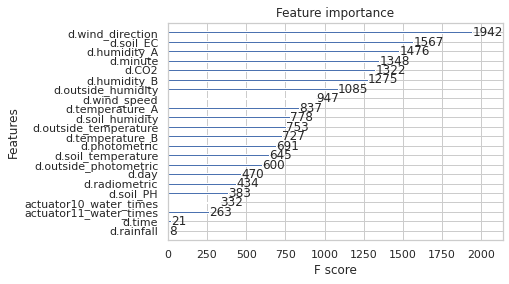

分類準確率 :  0.837739822180627
              precision    recall  f1-score   support

           0       0.84      0.61      0.71      2760
           1       0.84      0.95      0.89      5788

    accuracy                           0.84      8548
   macro avg       0.84      0.78      0.80      8548
weighted avg       0.84      0.84      0.83      8548



In [ ]:
# XG的介紹 https://www.itread01.com/content/1545533828.html
#         https://www.itread01.com/articles/1474874140.html
from xgboost import XGBClassifier

xg = XGBClassifier(n_estimators=500,
                   learning_rate= 0.5,
                   max_depth=6,
                   min_child_weight=1,
                   scale_pos_weight=10)

n = 'actuator09'
model = xg.fit(x_smote,y_smote)
y_predict = xg.predict(X_test)
#計算準確率
accuracy = accuracy_score(y_test[n],y_predict)
print('accuracy:%2.f%%'%(accuracy*100))
 
# 顯示重要特徵
plot_importance(model)
plt.show()
print('分類準確率 : ',accuracy_score(y_test[n],y_predict))
print(classification_report(y_test[n],y_predict,target_names=['0','1']))

actuator10 : accuracy:97%


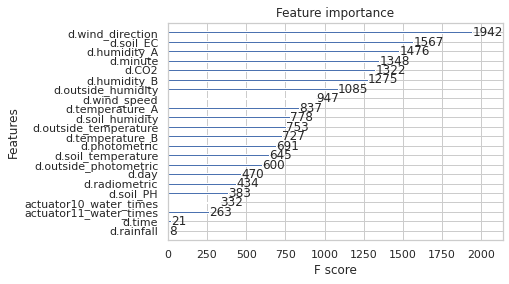

分類準確率 :  0.9714553111839027
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8238
           1       0.61      0.60      0.61       310

    accuracy                           0.97      8548
   macro avg       0.80      0.79      0.80      8548
weighted avg       0.97      0.97      0.97      8548



In [ ]:
from xgboost import XGBClassifier

xg = XGBClassifier(n_estimators=200,
                   learning_rate= 0.5,
                   max_depth=6,
                   min_child_weight=1,
                   scale_pos_weight=100)

n = 'actuator10'
xg.fit(X_train,y_train[n])
y_predict = xg.predict(X_test)
#計算準確率
accuracy = accuracy_score(y_test[n],y_predict)
print('actuator10 : accuracy:%2.f%%'%(accuracy*100))
 
# 顯示重要特徵
plot_importance(model)
plt.show()

# 分類報告
print('分類準確率 : ',accuracy_score(y_test[n],y_predict))
print(classification_report(y_test[n],y_predict,target_names=['0','1']))

actuator11 : accuracy = 98%


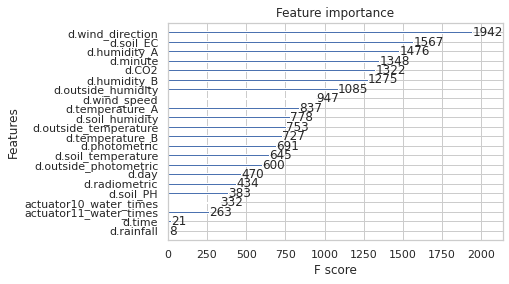

分類準確率 :  0.9796443612540945
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8324
           1       0.66      0.47      0.55       224

    accuracy                           0.98      8548
   macro avg       0.82      0.73      0.77      8548
weighted avg       0.98      0.98      0.98      8548



In [ ]:
from xgboost import XGBClassifier

xg = XGBClassifier(n_estimators=200,
                   learning_rate= 0.5,
                   max_depth=6,
                   min_child_weight=1,
                   scale_pos_weight=100)
n = 'actuator11'
xg.fit(X_train,y_train[n])
y_predict = xg.predict(X_test)
#計算準確率
accuracy = accuracy_score(y_test[n],y_predict)
print('actuator11 : accuracy = %2.f%%'%(accuracy*100))
 
# 顯示重要特徵
plot_importance(model)
plt.show()

# 分類報告
print('分類準確率 : ',accuracy_score(y_test[n],y_predict))
print(classification_report(y_test[n],y_predict,target_names=['0','1']))

# K-Means


In [ ]:
# 先將數據做預處理
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

scalar_1 = MinMaxScaler()
scalar_2 = StandardScaler()
X_train_09, X_test_09, y_train, y_test = train_test_split(data_09, 
                                                          label, 
                                                          test_size=0.3, 
                                                          random_state=1)
# 訓練 MinMaxScalar
print('MinMaxScalar : ')
n = 'actuator09'
X_train_09_norm = scalar_1.fit_transform(X_train_09)
X_test_09_norm = scalar_1.transform(X_test_09)
knn = KNeighborsClassifier()
knn.fit(X_train_09_norm,y_train)
# 預測
y_predict = knn.predict(X_test_09_norm)
# 計算準確率
accuracy = accuracy_score(y_test,y_predict)
print('accuracy:%2.f%%'%(accuracy*100))
# 分類報告
print('分類準確率 : ',accuracy_score(y_test,y_predict))
print(classification_report(y_test,y_predict,target_names=['1','2','3','4','5','6','7','8','9','10','11']))

# 訓練 StandarScalar
print('StandarScalar : ')
n = 'actuator09'
X_train_09_norm = scalar_2.fit_transform(X_train_09)
X_test_09_norm = scalar_2.transform(X_test_09)
knn = KNeighborsClassifier()
knn.fit(X_train_09_norm,y_train[n])
# 預測
y_predict = knn.predict(X_test_09_norm)
# 計算準確率
accuracy = accuracy_score(y_test[n],y_predict)
print('accuracy:%2.f%%'%(accuracy*100))
# 分類報告
print('分類準確率 : ',accuracy_score(y_test[n],y_predict))
print(classification_report(y_test[n],y_predict,target_names=['0','1']))

MinMaxScalar : 
accuracy:75%
分類準確率 :  0.7495320542817033
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      8377
           2       1.00      1.00      1.00      8468
           3       1.00      1.00      1.00      8469
           4       1.00      1.00      1.00      8394
           5       0.99      0.99      0.99      7470
           6       0.99      0.99      0.99      7476
           7       0.99      0.99      0.99      7476
           8       0.99      0.99      0.99      5454
           9       0.83      0.91      0.87      5788
          10       0.52      0.11      0.18       310
          11       0.72      0.22      0.34       224

   micro avg       0.98      0.98      0.98     67906
   macro avg       0.91      0.84      0.85     67906
weighted avg       0.98      0.98      0.98     67906
 samples avg       0.98      0.98      0.98     67906

StandarScalar : 
accuracy:82%
分類準確率 :  0.8203088441740758
              prec

In [ ]:
scalar_1 = MinMaxScaler()
scalar_2 = StandardScaler()
X_train_10, X_test_10, y_train, y_test = train_test_split(data_10, 
                                                          label, 
                                                          test_size=0.3, 
                                                          random_state=1)
# 訓練 MinMaxScalar
print('MinMaxScalar : ')
n = 'actuator10'
X_train_10_norm = scalar_1.fit_transform(X_train_10)
X_test_10_norm = scalar_1.transform(X_test_10)
knn = KNeighborsClassifier()
knn.fit(X_train_10_norm,y_train[n])
# 預測
y_predict = knn.predict(X_test_10_norm)
# 計算準確率
accuracy = accuracy_score(y_test[n],y_predict)
print('accuracy:%2.f%%'%(accuracy*100))
# 分類報告
print('分類準確率 : ',accuracy_score(y_test[n],y_predict))
print(classification_report(y_test[n],y_predict,target_names=['0','1']))

# 訓練 StandarScalar
print('StandarScalar : ')
n = 'actuator10'
X_train_10_norm = scalar_2.fit_transform(X_train_10)
X_test_10_norm = scalar_2.transform(X_test_10)
knn = KNeighborsClassifier()
knn.fit(X_train_10_norm,y_train[n])
# 預測
y_predict = knn.predict(X_test_10_norm)
# 計算準確率
accuracy = accuracy_score(y_test[n],y_predict)
print('accuracy:%2.f%%'%(accuracy*100))
# 分類報告
print('分類準確率 : ',accuracy_score(y_test[n],y_predict))
print(classification_report(y_test[n],y_predict,target_names=['0','1']))

MinMaxScalar : 
accuracy:96%
分類準確率 :  0.96408516612073
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      8238
           1       0.52      0.11      0.18       310

    accuracy                           0.96      8548
   macro avg       0.75      0.55      0.58      8548
weighted avg       0.95      0.96      0.95      8548

StandarScalar : 
accuracy:96%
分類準確率 :  0.9639681796911558
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      8238
           1       0.51      0.12      0.19       310

    accuracy                           0.96      8548
   macro avg       0.74      0.56      0.59      8548
weighted avg       0.95      0.96      0.95      8548

